In [270]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import constants
from astropy.coordinates import SkyCoord, Angle
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from regions import CircleSkyRegion
figsize = plt.rcParams["figure.figsize"]
figsize[1]=9
figsize[0]=9
plt.rcParams["figure.figsize"]=figsize

In [262]:
def station_HPBW(station,frequency):
    HPBW = ((constants.c/frequency)/station)*(180/np.pi)
    return HPBW

def converttodegrees(RA,Dec,unit):
    c = SkyCoord(RA,Dec,unit=unit)
    return c.ra.deg, c.dec.deg

def make_limits(RA,Dec,HPBW): ### Make the bounding boxes for criteria
    ## make sure that these are in degrees
    RA_lims = [RA-((HPBW/2.)/np.cos(Dec*(np.pi/180.))),RA+((HPBW/2.)/np.cos(Dec*(np.pi/180.)))]
    Dec_lims = [Dec-(HPBW/2.),Dec+(HPBW/2.)]
    return RA_lims, Dec_lims
def convert_lims_to_SkyCoords(lims):
    c1 = SkyCoord(lims[0][0],lims[1][0],unit=('deg'))
    c2 = SkyCoord(lims[0][1],lims[1][1],unit=('deg'))
    return c1, c2

In [267]:
HPBW_EF = 1.05*station_HPBW(78,1.65849E9) ## Effelsberg HPBW - 1.05 is blockage correction factor
HPBW_LO = 1.05*station_HPBW(67,1.65849E9) ## Lovell HPBW - 1.05 is blockage correction factor
print 'Effelsberg HPBW: %.2f arcmin' % (HPBW_EF*60)
print 'Lovell HPBW    : %.2f arcmin' % (HPBW_LO*60)

Effelsberg HPBW: 8.37 arcmin
Lovell HPBW    : 9.74 arcmin


In [253]:
#### Set the pointings ####
P1 =   converttodegrees('12:37:20.0','+62:16:28.0',unit=('hour','deg'))
P2 =   converttodegrees('12:36:20.0','+62:16:28.0',unit=('hour','deg'))
P3 =   converttodegrees('12:36:20.0','+62:09:28.0',unit=('hour','deg'))
P4 =   converttodegrees('12:37:20.0','+62:09:28.0',unit=('hour','deg'))
HDFN = converttodegrees('12:36:50.0','+62:12:58.0',unit=('hour','deg'))

In [268]:
### Make the bounding boxes for pointings of Effelsberg
P1_lims_EF = make_limits(P1[0],P1[1],HPBW_EF)
P2_lims_EF = make_limits(P2[0],P2[1],HPBW_EF)
P3_lims_EF = make_limits(P3[0],P3[1],HPBW_EF)
P4_lims_EF = make_limits(P4[0],P4[1],HPBW_EF)
HDFN_lims_EF = make_limits(HDFN[0],HDFN[1],HPBW_EF)
### Make the bounding boxes for pointings of Lovell
P1_lims_LO = make_limits(P1[0],P1[1],HPBW_LO)
P2_lims_LO = make_limits(P2[0],P2[1],HPBW_LO)
P3_lims_LO = make_limits(P3[0],P3[1],HPBW_LO)
P4_lims_LO = make_limits(P4[0],P4[1],HPBW_LO)
HDFN_lims_LO = make_limits(HDFN[0],HDFN[1],HPBW_LO)

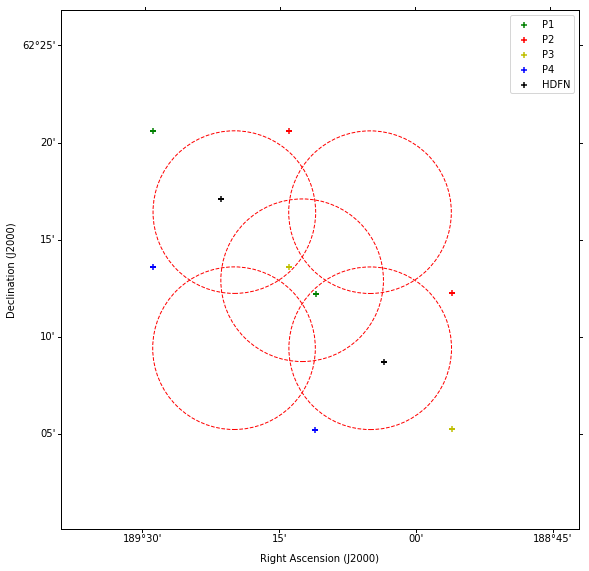

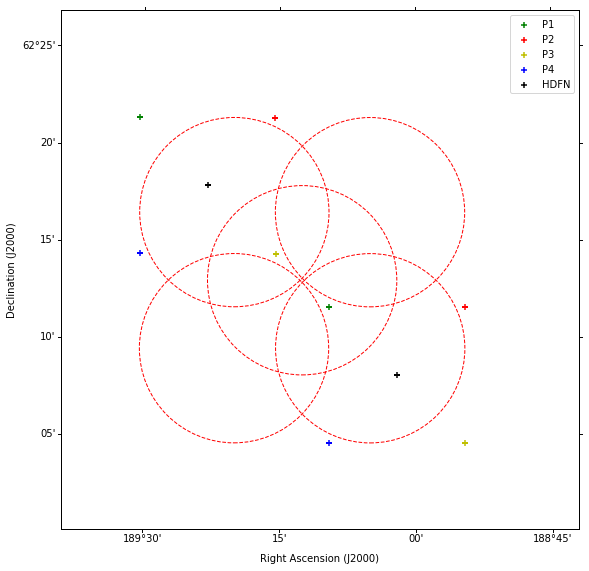

In [275]:
def make_figure(P1_lims,P2_lims,P3_lims,P4_lims,HDFN_lims,HPBW,telescope):
    outfilename = 'HDFC0155_NA_PBCOR_IMPy.fits'
    hdu = fits.open(outfilename)
    wcs = WCS(hdu[0].header)
    fig = plt.figure()
    ax = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=wcs)
    #ax1 = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=wcs)
    lon = ax.coords['ra']
    lat = ax.coords['dec']
    #lon.set_major_formatter('dd:mm:ss')
    #lat.set_major_formatter('dd')
    lon.set_axislabel('Right Ascension (J2000)', minpad=1.5)
    lat.set_axislabel('Declination (J2000)', minpad=1)
    ax.set_xlim(-800000, 800000)
    ax.set_ylim(-800000, 800000)


    ax.scatter(convert_lims_to_SkyCoords(P1_lims)[0].ra.degree, convert_lims_to_SkyCoords(P1_lims)[0].dec.degree,\
               transform=ax.get_transform('icrs'), marker='+',color='g',norm=matplotlib.colors.LogNorm(),alpha=1)
    ax.scatter(convert_lims_to_SkyCoords(P1_lims)[1].ra.degree, convert_lims_to_SkyCoords(P1_lims)[1].dec.degree,\
               transform=ax.get_transform('icrs'), marker='+',color='g',norm=matplotlib.colors.LogNorm(),alpha=1,label='P1')

    ax.scatter(convert_lims_to_SkyCoords(P2_lims)[0].ra.degree, convert_lims_to_SkyCoords(P2_lims)[0].dec.degree,\
               transform=ax.get_transform('icrs'), marker='+',color='r',norm=matplotlib.colors.LogNorm(),alpha=1)
    ax.scatter(convert_lims_to_SkyCoords(P2_lims)[1].ra.degree, convert_lims_to_SkyCoords(P2_lims)[1].dec.degree,\
               transform=ax.get_transform('icrs'), marker='+',color='r',norm=matplotlib.colors.LogNorm(),alpha=1,label='P2')

    ax.scatter(convert_lims_to_SkyCoords(P3_lims)[0].ra.degree, convert_lims_to_SkyCoords(P3_lims)[0].dec.degree,\
               transform=ax.get_transform('icrs'), marker='+',color='y',norm=matplotlib.colors.LogNorm(),alpha=1)
    ax.scatter(convert_lims_to_SkyCoords(P3_lims)[1].ra.degree, convert_lims_to_SkyCoords(P3_lims)[1].dec.degree,\
               transform=ax.get_transform('icrs'), marker='+',color='y',norm=matplotlib.colors.LogNorm(),alpha=1,label='P3')

    ax.scatter(convert_lims_to_SkyCoords(P4_lims)[0].ra.degree, convert_lims_to_SkyCoords(P4_lims)[0].dec.degree,\
               transform=ax.get_transform('icrs'), marker='+',color='b',norm=matplotlib.colors.LogNorm(),alpha=1)
    ax.scatter(convert_lims_to_SkyCoords(P4_lims)[1].ra.degree, convert_lims_to_SkyCoords(P4_lims)[1].dec.degree,\
               transform=ax.get_transform('icrs'), marker='+',color='b',norm=matplotlib.colors.LogNorm(),alpha=1,label='P4')

    ax.scatter(convert_lims_to_SkyCoords(HDFN_lims)[0].ra.degree, convert_lims_to_SkyCoords(HDFN_lims)[0].dec.degree,\
               transform=ax.get_transform('icrs'), marker='+',color='k',norm=matplotlib.colors.LogNorm(),alpha=1)
    ax.scatter(convert_lims_to_SkyCoords(HDFN_lims)[1].ra.degree, convert_lims_to_SkyCoords(HDFN_lims)[1].dec.degree,\
               transform=ax.get_transform('icrs'), marker='+',color='k',norm=matplotlib.colors.LogNorm(),alpha=1,label='HDFN')

    divider = make_axes_locatable(ax) 
    region1 = CircleSkyRegion(SkyCoord('12h36m50.0s', '+62d12m58.00s', frame='icrs'), Angle(HPBW/2., 'deg'))
    pixel_region1 = region1.to_pixel(wcs)
    region2 = CircleSkyRegion(SkyCoord('12h37m20.0s', '+62d16m28.00s', frame='icrs'), Angle(HPBW/2., 'deg'))
    pixel_region2 = region2.to_pixel(wcs)
    region3 = CircleSkyRegion(SkyCoord('12h36m20.0s', '+62d16m28.00s', frame='icrs'), Angle(HPBW/2., 'deg'))
    pixel_region3 = region3.to_pixel(wcs)
    region4 = CircleSkyRegion(SkyCoord('12h36m20.0s', '+62d09m28.00s', frame='icrs'), Angle(HPBW/2., 'deg'))
    pixel_region4 = region4.to_pixel(wcs)
    region5 = CircleSkyRegion(SkyCoord('12h37m20.0s', '+62d09m28.00s', frame='icrs'), Angle(HPBW/2., 'deg'))
    pixel_region5 = region5.to_pixel(wcs)
    pixel_region1.plot(ax,facecolor='none', edgecolor='red',linestyle='--')
    pixel_region2.plot(ax,facecolor='none', edgecolor='red',linestyle='--')
    pixel_region3.plot(ax,facecolor='none', edgecolor='red',linestyle='--')
    pixel_region4.plot(ax,facecolor='none', edgecolor='red',linestyle='--')
    pixel_region5.plot(ax,facecolor='none', edgecolor='red',linestyle='--')
    ax.legend()
    #print np.amin(rms), np.amax(rms)
    fig.savefig('%s_pointings.pdf' % telescope,bbox_inches='tight',dpi=fig.dpi,format="pdf")
    plt.show()
    
make_figure(P1_lims_EF,P2_lims_EF,P3_lims_EF,P4_lims_EF,HDFN_lims_EF,HPBW_EF,telescope='Effelsberg')
make_figure(P1_lims_LO,P2_lims_LO,P3_lims_LO,P4_lims_LO,HDFN_lims_LO,HPBW_LO,telescope='Lovell')

##### With limits correct then define set of criteria for which to flag these data.
Can define if something is inside by this criteria

${\rm RA_{lims} = RA_1, RA_2}$ where ${\rm RA_2>RA_1}$

${\rm Dec_{lims} = Dec_1, Dec_2}$ where ${\rm Dec_2>Dec_1}$

And limit whether coordinate inside is therefore:

${\rm RA<RA_2~and~RA>RA_1~and~Dec<Dec_2~and~Dec>Dec_1}$



In [277]:
def coordinate_criteria(RA,Dec,P1_lims,P2_lims,P3_lims,P4_lims,HDFN_lims):
    flag = []
    if (RA>P1_lims[0][0]) and (Dec>P1_lims[1][0]) and (RA<P1_lims[0][1]) and (Dec<P1_lims[1][1]):
        flag = flag+['P1']
    if (RA>P2_lims[0][0]) and (Dec>P2_lims[1][0]) and (RA<P2_lims[0][1]) and (Dec<P2_lims[1][1]):
        flag = flag+['P2']
    if (RA>P3_lims[0][0]) and (Dec>P3_lims[1][0]) and (RA<P3_lims[0][1]) and (Dec<P3_lims[1][1]):
        flag = flag+['P3']
    if (RA>P4_lims[0][0]) and (Dec>P4_lims[1][0]) and (RA<P4_lims[0][1]) and (Dec<P4_lims[1][1]):
        flag = flag+['P4']
    if (RA>HDFN_lims[0][0]) and (Dec>P1_lims[1][0]) and (RA<HDFN_lims[0][1]) and (Dec<HDFN_lims[1][1]):
        flag = flag+['HDFN']
    return np.array(flag)

In [310]:
x = np.load('rms_pbcor.npy')
x[1][2]

'189.000583333'

In [311]:
noflagEF = []
for i in range(len(x[0])):
    RA = float(x[1][i])
    Dec = float(x[2][i])
    noflagEF = noflagEF + [coordinate_criteria(RA, Dec,P1_lims_EF,P2_lims_EF,P3_lims_EF,P4_lims_EF,HDFN_lims_EF)]
noflagEF = np.array(noflagEF)

noflagLO = []
for i in range(len(x[0])):
    RA = float(x[1][i])
    Dec = float(x[2][i])
    noflagLO = noflagLO + [coordinate_criteria(RA, Dec,P1_lims_LO,P2_lims_LO,P3_lims_LO,P4_lims_LO,HDFN_lims_LO)]
noflagLO = np.array(noflagLO)

In [312]:
EF_no_flags = np.vstack([x,noflagEF])
LO_no_flags = np.vstack([x,noflagLO])

In [320]:
np.where(EF_no_flags[0]=='HDFC0155_PBCOR_NA_IM.fits')

(array([524]),)

In [321]:
EF_no_flags[:,np.where(EF_no_flags[0]=='HDFC0155_PBCOR_NA_IM.fits')]

array([[['HDFC0155_PBCOR_NA_IM.fits']],

       [['189.175375']],

       [['62.2253888889']],

       [['6.03388343734']],

       [[array(['P2', 'P3', 'HDFN'],
      dtype='|S4')]]], dtype=object)

In [322]:
LO_no_flags[:,np.where(EF_no_flags[0]=='HDFC0155_PBCOR_NA_IM.fits')]

array([[['HDFC0155_PBCOR_NA_IM.fits']],

       [['189.175375']],

       [['62.2253888889']],

       [['6.03388343734']],

       [[array(['P1', 'P2', 'P3', 'P4', 'HDFN'],
      dtype='|S4')]]], dtype=object)